<a href="https://colab.research.google.com/github/SSRaylia/Practice/blob/master/Finding_the_Best_Route.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding the Best Route - The Travelling Salesman Problem

The travelling salesman problem (TSP) asks the following question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?". Our team decided to try using Python to solve this problem.

# Import Data

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("https://gist.githubusercontent.com/mbostock/9535021/raw/902265051e775cd35a6aa6307a23070f739ebed1/us-state-capitals.csv")

In [0]:
df.head()

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629


#Create necessary classes and functions

##Create class to handle "cities"

In [0]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [0]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

##Create cityList containing lat/long for US state capitols

In [0]:
cityList = []

for i in range(0,len(df)):
    cityList.append(City(x = round(float(df.iloc[i,[2]]),2), y = round(float(df.iloc[i,[3]]),2)))

In [0]:
cityList

[(32.38,-86.3),
 (58.3,-134.42),
 (33.45,-112.1),
 (34.75,-92.29),
 (38.58,-121.49),
 (39.74,-104.98),
 (41.76,-72.68),
 (39.16,-75.52),
 (21.31,-157.86),
 (30.44,-84.28),
 (33.75,-84.39),
 (43.62,-116.2),
 (39.8,-89.65),
 (39.77,-86.16),
 (41.59,-93.6),
 (39.05,-95.68),
 (38.19,-84.88),
 (30.46,-91.19),
 (44.31,-69.78),
 (38.98,-76.49),
 (42.36,-71.06),
 (42.73,-84.56),
 (44.96,-93.1),
 (32.3,-90.18),
 (38.58,-92.17),
 (46.59,-112.02),
 (40.81,-96.7),
 (39.16,-119.77),
 (43.21,-71.54),
 (40.22,-74.77),
 (35.68,-105.94),
 (35.78,-78.64),
 (46.82,-100.78),
 (42.65,-73.76),
 (39.96,-83.0),
 (35.49,-97.5),
 (44.94,-123.03),
 (40.26,-76.88),
 (41.83,-71.41),
 (34.0,-81.03),
 (44.37,-100.35),
 (36.17,-86.78),
 (30.27,-97.74),
 (40.78,-111.89),
 (44.26,-72.58),
 (37.54,-77.43),
 (47.04,-122.91),
 (38.34,-81.61),
 (43.07,-89.38),
 (41.14,-104.82)]

##Create a fitness function

In [0]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

#Create our initial population

##Route generator

In [0]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

##Create first "population" (list of routes)

In [0]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

#Create the genetic algorithm

##Rank individuals

In [0]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

##Create a selection function that will be used to make the list of parent routes

In [0]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

##Create mating pool

In [0]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

##Create a crossover function for two parents to create one child

In [0]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

##Create function to run crossover over full mating pool

In [0]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

##Create function to mutate a single route

In [0]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

##Create function to run mutation over entire population

In [0]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

##Put all steps together to create the next generation

In [0]:

def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

##Final step: create the genetic algorithm

In [0]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [0]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][0]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

#Running the genetic algorithm

In [0]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Initial distance: 901.5271555935752
Final distance: 1.0


[(35.78,-78.64),
 (37.54,-77.43),
 (40.26,-76.88),
 (41.83,-71.41),
 (41.76,-72.68),
 (30.44,-84.28),
 (32.38,-86.3),
 (38.19,-84.88),
 (38.34,-81.61),
 (39.16,-75.52),
 (44.26,-72.58),
 (42.36,-71.06),
 (44.31,-69.78),
 (42.65,-73.76),
 (43.21,-71.54),
 (33.75,-84.39),
 (42.73,-84.56),
 (35.49,-97.5),
 (39.05,-95.68),
 (40.81,-96.7),
 (41.59,-93.6),
 (35.68,-105.94),
 (46.82,-100.78),
 (44.37,-100.35),
 (32.3,-90.18),
 (44.96,-93.1),
 (43.07,-89.38),
 (30.46,-91.19),
 (30.27,-97.74),
 (34.75,-92.29),
 (36.17,-86.78),
 (41.14,-104.82),
 (40.78,-111.89),
 (43.62,-116.2),
 (46.59,-112.02),
 (47.04,-122.91),
 (38.58,-121.49),
 (33.45,-112.1),
 (44.94,-123.03),
 (39.16,-119.77),
 (58.3,-134.42),
 (21.31,-157.86),
 (39.74,-104.98),
 (38.58,-92.17),
 (39.8,-89.65),
 (38.98,-76.49),
 (40.22,-74.77),
 (34.0,-81.03),
 (39.96,-83.0),
 (39.77,-86.16)]

#Plot the progress

In [0]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

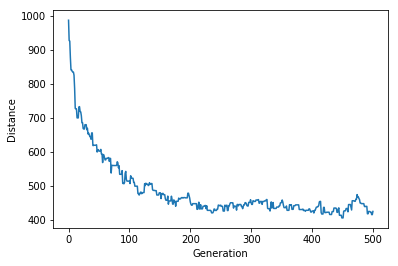

In [0]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)